# KNN Classification
This project classifies vertebral column data as normal or abnormal using six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine. (310*7)

KNN is used to conduct this binary classification.

##Setup

In [ ]:
# import libraries
import numpy as np                   #data manipulation
import pandas as pd
import matplotlib.pyplot as plt      #visualisation
import seaborn as sns
from sklearn import neighbors        #machine learning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline
sns.set(style='white',color_codes=True)

##Load the vertebral column dataset

In [ ]:
# load data into data frame
ds = pd.read_table('column_2C.dat',sep=' ',header=None,names=list('ABCDEFY'))

In [ ]:
ds

,A,B,C,D,E,F,Y
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


##Exploration and pre-processing
### (b)i Make scatterplots of the independent variables in the dataset.

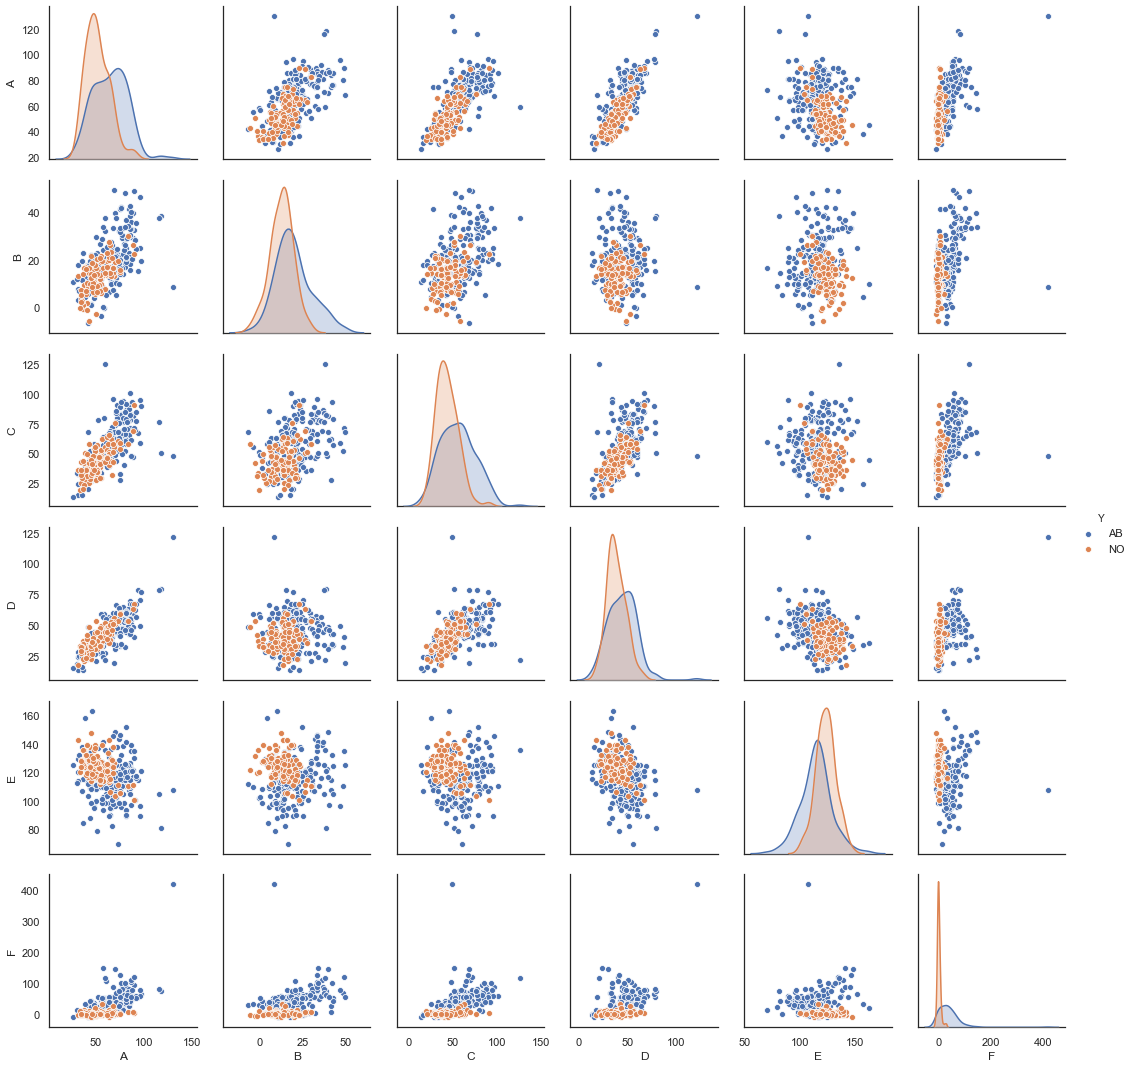

In [ ]:
# make scatterplots
sns.pairplot(ds,vars=list('ABCDEF'),hue='Y')

### (b)ii Make boxplots for each of the independent variables.

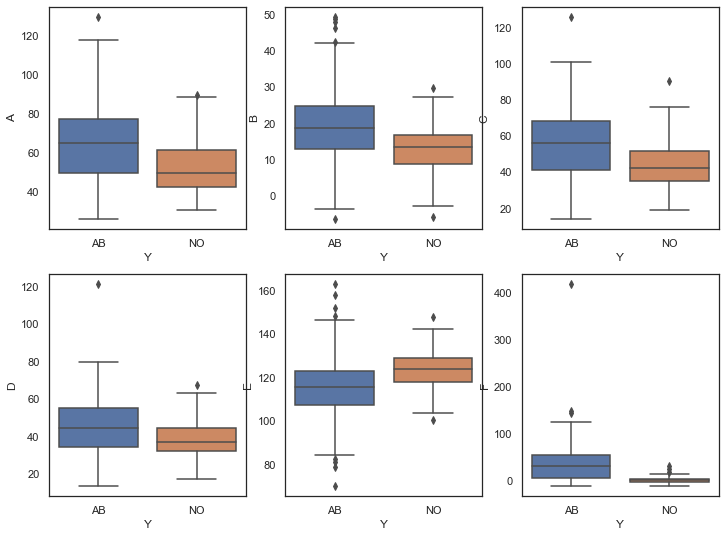

In [ ]:
# make boxplots
plt.figure(figsize=(12,9))
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.boxplot(x='Y',y='ABCDEF'[i-1],data=ds)

### (b)iii

In [ ]:
# pre-process
## encode
ds2 = ds.copy()
ds2.Y = np.where(ds2.Y=='AB',1,0)

In [ ]:
ds2

,A,B,C,D,E,F,Y
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [ ]:
## split data
NO = ds2[ds2.Y == 0]
AB = ds2[ds2.Y == 1]
tr = pd.concat([NO[:70],AB[:140]])
te = pd.concat([NO[70:],AB[140:]])
tr_x = tr[list('ABCDEF')]
tr_y = tr['Y']
te_x = te[list('ABCDEF')]
te_y = te['Y']

In [ ]:
tr_x

,A,B,C,D,E,F
210,38.51,16.96,35.11,21.54,127.63,7.99
211,54.92,18.97,51.60,35.95,125.85,2.00
212,44.36,8.95,46.90,35.42,129.22,4.99
213,48.32,17.45,48.00,30.87,128.98,-0.91
214,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09
136,88.02,39.84,81.77,48.18,116.60,56.77
137,83.40,34.31,78.42,49.09,110.47,49.67
138,72.05,24.70,79.87,47.35,107.17,56.43


In [ ]:
te_y

280    0
281    0
282    0
283    0
284    0
      ..
205    1
206    1
207    1
208    1
209    1
Name: Y, Length: 100, dtype: int32

## Build, train the KNN model
(c)i

In [ ]:
# build a knn model and train it with training data
knn = neighbors.KNeighborsClassifier(metric='euclidean')
knn.fit(tr_x,tr_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##Evaluate the model
### (c)ii

In [ ]:
# test the model with testing data
pre_te = knn.predict(te_x)

In [ ]:
pre_te

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Error Rate')

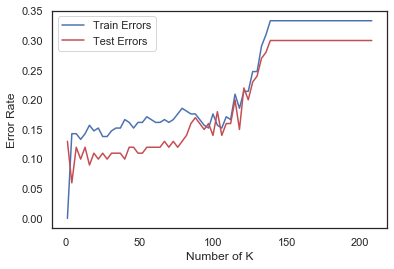

In [ ]:
# plot train and test error in terms of k
tr_err,te_err = [],[]
k = np.arange(208,0,-3)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
plt.plot(k,tr_err,'b',label = 'Train Errors') 
plt.plot(k,te_err,'r',label = 'Test Errors')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

In [ ]:
# find the k when test error rate is the lowest
k[te_err.index(min(te_err))]

4

In [ ]:
# find the lowest train error rate
min(tr_err[:69])

0.1333333333333333

#### **Answer1**

The most suitable k is k=4, because the test error is the lowest when obtained from the KNN model with 4 nearest neighbors, which means the model performs well in predicting for the high accuracy. And the train error rate is not the lowest when k=4, which means the model is less overfitting.
When k is less than 4, the train error is zero when k =1 but the test error is high which means the model is overfitting. It fits to the noise in training data and fail to generalize. When k is more than 4, the train error and test error are both high which the accuracy is low.

In [ ]:
# when k = 4: 
knn = neighbors.KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn.fit(tr_x,tr_y)
pre_te = knn.predict(te_x)

In [ ]:
# calculate confusion matrix
cm = confusion_matrix(te_y,pre_te)

In [ ]:
pd.DataFrame(cm)

,0,1
0,25,5
1,1,69


In [ ]:
# calculate  true positive rate, true negative rate
tpr = cm[0,0]/(cm[0,0]+cm[0,1])
tnr = cm[1,1]/(cm[1,0]+cm[1,1])

In [ ]:
tpr

0.8333333333333334

In [ ]:
tnr

0.9857142857142858

In [ ]:
# calculate precision, F-score
print(classification_report(te_y,pre_te))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



##Model selection
### (c)iii

Text(0, 0.5, 'Best Test Error Rate')

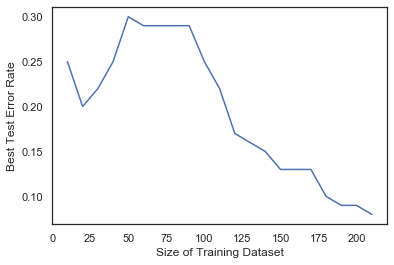

In [ ]:
#plot the best test error rate for different size of training set in terms of k
btr_err,bte_err = [],[]
n = np.arange(10,211,10)
for i in n:
    tr_sub = pd.concat([NO[:int(i/3)],AB[:i-int(i/3)]])
    tr_sx = tr_sub[list('ABCDEF')]
    tr_sy = tr_sub['Y']
    tr_err,te_err = [],[]
    for j in range(1,i+1,5):
        knn = neighbors.KNeighborsClassifier(n_neighbors=j,metric='euclidean')
        knn.fit(tr_sx,tr_sy)
        tr_err.append(1-knn.score(tr_sx,tr_sy))
        te_err.append(1-knn.score(te_x,te_y))
    btr_err.append(min(tr_err[1:]))
    bte_err.append(min(te_err))
plt.plot(n,bte_err)
plt.xlabel('Size of Training Dataset')
plt.ylabel('Best Test Error Rate')

In [ ]:
# find the lowest train error rate
min(btr_err)

0.09999999999999998

### (d)i

In [ ]:
# train a knn model with Minkowski metric and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
pd.set_option('display.max_columns', 50)
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.00,11.00,16.00,21.0,26.00,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.0,146.0,151.0,156.0,161.0,166.0,171.0,176.0,181.0,186.0,191.0,196.0
test errors,0.13,0.08,0.12,0.09,0.1,0.11,0.11,0.11,0.11,0.12,0.11,0.12,0.12,0.13,0.13,0.12,0.13,0.16,0.16,0.15,0.17,0.14,0.17,0.18,0.22,0.21,0.26,0.28,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3


In [ ]:
# find the lowest test error rate
te_err_tab[te_err_tab == min(te_err)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test errors,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.13809523809523805

Text(0, 0.5, 'Error Rate')

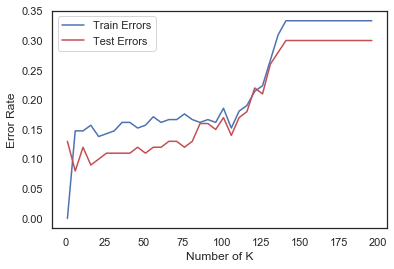

In [ ]:
# plot train error rate and test error rate
plt.plot(k,tr_err,'b',label = 'Train Errors') 
plt.plot(k,te_err,'r',label = 'Test Errors')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

#### **Answer2**

The best k is 6 in this case. Because it has the minimum test error rate, which means the accuracy for prediction is high when the knn model has 6 nearest neighbors. When k=1, the train error is zero when but the test error is higher than when k=6 which means the model is overfitting and poor in generalization. 

### (d)iA

In [ ]:
# train a knn model with Manhattan metric and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.00,11.00,16.00,21.00,26.00,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.0,96.0,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.0,146.0,151.0,156.0,161.0,166.0,171.0,176.0,181.0,186.0,191.0,196.0
test errors,0.12,0.11,0.11,0.12,0.12,0.11,0.12,0.13,0.13,0.13,0.14,0.13,0.15,0.15,0.14,0.14,0.16,0.15,0.2,0.2,0.22,0.21,0.23,0.21,0.22,0.24,0.28,0.28,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3


In [ ]:
# find the lowest test error rate
te_err_tab[te_err_tab == min(te_err)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test errors,NaN,0.11,0.11,NaN,NaN,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.1333333333333333

Text(0, 0.5, 'Error Rate')

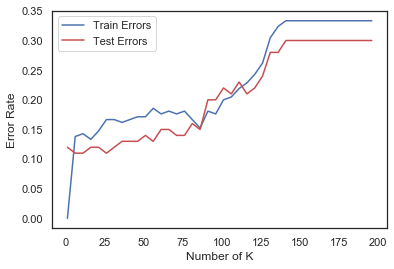

In [ ]:
# plot train error rate and test error rate
plt.plot(k,tr_err,'b',label = 'Train Errors') 
plt.plot(k,te_err,'r',label = 'Test Errors')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

#### **Answer3**

The best k is 26 in this case. Because it has the lowest test error rate and it is the largest k among values of k with same lowest test error rate. 
The minimum test error rate signifies the model's accuracy of prediction, but small k leads to high variance and low bias, which tends to be overfitting. So when there are multiple lowest test errors from some values of k, it will be better to choose the largest k in them. It is also shown in the plot that the model is not overfitting when k=26.

### (d)iB

In [ ]:
# train knn models with k=26 in terms of p and test them
tr_err,te_err = [],[]
p = np.linspace(0.1,1,10)
for i in p:
    knn = neighbors.KNeighborsClassifier(n_neighbors=26,p=10**i)
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([p,te_err],index=['lg(p)','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9
lg(p),0.1,0.2,0.30,0.4,0.50,0.6,0.70,0.80,0.90,1.00
test errors,0.1,0.1,0.11,0.1,0.11,0.1,0.11,0.11,0.11,0.11


In [ ]:
# find the lowest train error rate
min(tr_err)

0.13809523809523805

Text(0, 0.5, 'Error Rate')

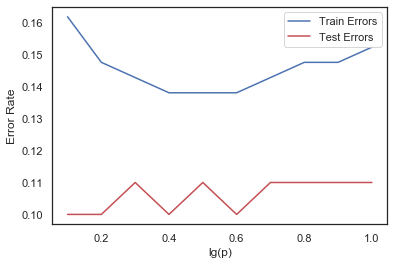

In [ ]:
# plot train error rate and test error rate
plt.plot(p,tr_err,'b',label = 'Train Errors') 
plt.plot(p,te_err,'r',label = 'Test Errors')
plt.legend()
plt.xlabel('lg(p)')
plt.ylabel('Error Rate')

#### **Answer4**

The best lg(p) is 0.1. Because the test error rate is the lowest. And within several lg(p) which have same lowest test errors, when lg(p)=0.1, the train error rate is higher than others which means this model is less overfitting.

### (d)iC

In [ ]:
# train a knn model with Chebyshev metric and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.0,11.00,16.00,21.00,26.00,31.00,36.0,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.0,146.0,151.0,156.0,161.0,166.0,171.0,176.0,181.0,186.0,191.0,196.0
test errors,0.13,0.1,0.12,0.08,0.11,0.12,0.12,0.1,0.13,0.12,0.12,0.12,0.14,0.13,0.14,0.11,0.14,0.12,0.15,0.14,0.19,0.18,0.18,0.18,0.21,0.21,0.25,0.28,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3


In [ ]:
# find the lowest test error rate
te_err_tab[te_err_tab == min(te_err)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test errors,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.1333333333333333

Text(0, 0.5, 'Error Rate')

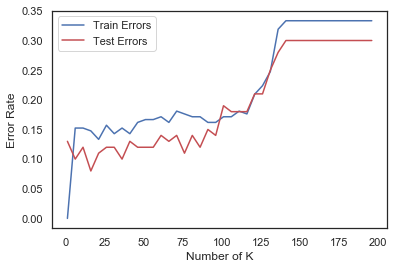

In [ ]:
# plot train error rate and test error rate
plt.plot(k,tr_err,'b',label = 'Train Errors') 
plt.plot(k,te_err,'r',label = 'Test Errors')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

#### **Answer5**

The best k is 16 in this case. Because it has the minimum test error rate, which means the accuracy for prediction is high when the knn model has 16 nearest neighbors.  

### (d)ii

In [ ]:
# train a knn model with Mahalanobis metric and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(algorithm='brute',n_neighbors=i,metric='mahalanobis',metric_params={'V':np.cov(tr_x)})
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.00,11.00,16.0,21.00,26.00,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.0,126.0,131.0,136.0,141.0,146.0,151.0,156.0,161.0,166.0,171.0,176.0,181.0,186.0,191.0,196.0
test errors,0.18,0.16,0.19,0.2,0.23,0.21,0.21,0.23,0.23,0.24,0.25,0.26,0.26,0.26,0.27,0.27,0.25,0.27,0.28,0.26,0.28,0.29,0.29,0.29,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3


In [ ]:
# find the lowest test error rate
te_err_tab[te_err_tab == min(te_err)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test errors,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.11904761904761907

#### **Answer6**

The best k is 6 in this case. Because it has the minimum test error rate, which means the accuracy for prediction is high when the knn model has 6 nearest neighbors.  

### (e)

In [ ]:
# train a knn model with Euclidean metric by weighted decision and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights='distance')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.0,11.00,16.00,21.00,26.00,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.00,146.00,151.00,156.0,161.00,166.00,171.00,176.00,181.00,186.00,191.00,196.00
test errors,0.13,0.1,0.12,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.12,0.13,0.13,0.14,0.14,0.12,0.14,0.14,0.13,0.13,0.13,0.14,0.14,0.17,0.19,0.19,0.2,0.23,0.25,0.27,0.27,0.27,0.27,0.28,0.28


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.0

#### Answer8

The best test error rate is 0.1 when k is 6 in this case.

In [ ]:
# train a knn model with Manhattan metric by weighted decision and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='distance')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.00,11.00,16.00,21.00,26.0,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.00,146.00,151.00,156.00,161.00,166.00,171.00,176.00,181.00,186.00,191.00,196.00
test errors,0.12,0.11,0.11,0.12,0.11,0.1,0.11,0.11,0.11,0.11,0.12,0.12,0.13,0.13,0.11,0.12,0.14,0.14,0.13,0.13,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.16,0.17,0.18,0.19,0.21,0.24,0.25,0.27,0.27,0.27,0.27,0.28,0.29


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.0

#### **Answer7**

The best test error rate is 0.1 when k is 26 in this case.

In [ ]:
# train a knn model with Chebyshev metric by weighted decision and test it in terms of k
tr_err,te_err = [],[]
k = np.arange(1,197,5)
for i in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(tr_x,tr_y)
    tr_err.append(1-knn.score(tr_x,tr_y))
    te_err.append(1-knn.score(te_x,te_y))
#summarize the test errors in a table
te_err_tab = pd.DataFrame([k,te_err],index=['k','test errors'])

In [ ]:
te_err_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
k,1.00,6.00,11.00,16.00,21.00,26.00,31.00,36.00,41.00,46.00,51.00,56.00,61.00,66.00,71.00,76.00,81.00,86.00,91.00,96.00,101.00,106.00,111.00,116.00,121.00,126.00,131.00,136.00,141.00,146.00,151.00,156.00,161.00,166.00,171.00,176.00,181.00,186.00,191.00,196.00
test errors,0.13,0.13,0.12,0.11,0.12,0.12,0.11,0.11,0.11,0.12,0.12,0.12,0.11,0.13,0.12,0.12,0.12,0.14,0.13,0.14,0.14,0.14,0.14,0.14,0.15,0.14,0.16,0.16,0.18,0.19,0.21,0.21,0.23,0.26,0.26,0.26,0.27,0.27,0.27,0.28


In [ ]:
# find the lowest train error rate
min(tr_err[1:])

0.0

#### Answer9

The best test error rate is 0.11 when k is 16, 31, 36, 41 or 61 in this case.

### (f)

Except for zero which is obtained in all models when k=1 and in models with weighted decision, the lowest train error rate I achieved in this homework is 0.09999999999999998. It is in (c)iii from a knn model with Euclidean metric and certain k trained with a subset of training data.